# Aula 2

Explorando visualização de dados e boas práticas

## Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_to = "../../assets/datasets/ml-latest-small/"

## Carregando _dataset_ e Gerando _DataFrame_

### Movies _DataFrame_

In [3]:
# Movies DataFrame
moviesDF = pd.read_csv(path_to + 'movies.csv')
moviesDF.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


### Ratings _DataFrame_

In [4]:
# Ratings DataFrame
ratingsDF = pd.read_csv(path_to + 'ratings.csv')
ratingsDF.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


### Genres _DataFrame_

In [5]:
genresDF = moviesDF['genres'].str.get_dummies('|')
genresDF.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Aula 1 _DataFrame_

In [6]:
# Adicionando coluna de nota média
rating_mean = ratingsDF.groupby('movieId')['rating'].mean()
aula1DF = moviesDF.join(rating_mean, on='movieId')
aula1DF = aula1DF.rename(columns={'rating':'ratingMean'})

# Adicionando coluna de quantidade de notas
rating_count = ratingsDF.groupby('movieId')['rating'].count()
aula1DF = aula1DF.join(rating_count, on='movieId')
aula1DF = aula1DF.rename(columns={'rating':'ratingCount'})

aula1DF.head(3)

,movieId,title,genres,ratingMean,ratingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0


## Explorando plotagens

In [7]:
genresOccurenceSeries = genresDF.sum()
genresOccurenceSeries

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [8]:
genresOrderedOccurenceSeries = genresOccurenceSeries.sort_values(ascending=False)
n_genres = len(genresOrderedOccurenceSeries)
genresOrderedOccurenceSeries

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [9]:
genresOrderedOccurenceSeries.index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [10]:
genresOrderedOccurenceSeries.values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

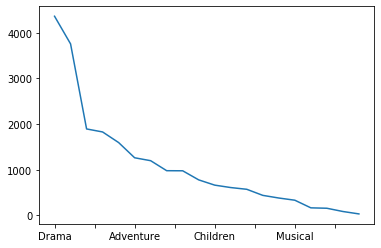

In [11]:
# Não faz sentido pois os dados não são contínuos
genresOrderedOccurenceSeries.plot()

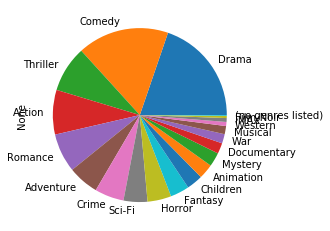

In [12]:
# Gráficos de pizza não são eficiente
# A paleta de cores se repete, porém isso não significa uma correlação entre categorias
genresOrderedOccurenceSeries.plot(kind='pie')

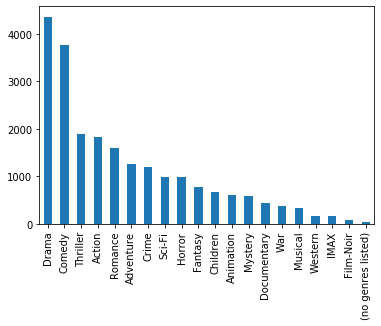

In [13]:
genresOrderedOccurenceSeries.plot(kind='bar')

### Gráfico com seaborn

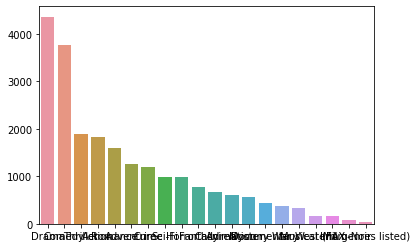

In [14]:
sns.barplot(
    x=genresOrderedOccurenceSeries.index,
    y=genresOrderedOccurenceSeries.values
)

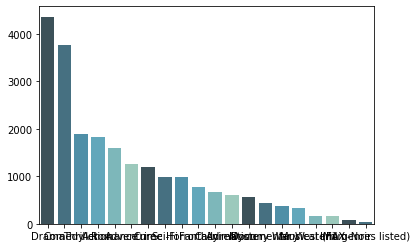

In [15]:
sns.barplot(
    x=genresOrderedOccurenceSeries.index,
    y=genresOrderedOccurenceSeries.values,
    palette=sns.color_palette("GnBu_d")
)

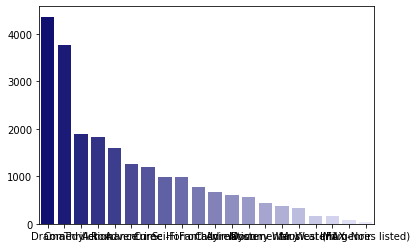

In [16]:
sns.barplot(
    x=genresOrderedOccurenceSeries.index,
    y=genresOrderedOccurenceSeries.values,
    palette=sns.light_palette("navy", n_colors=n_genres, reverse=True)
)

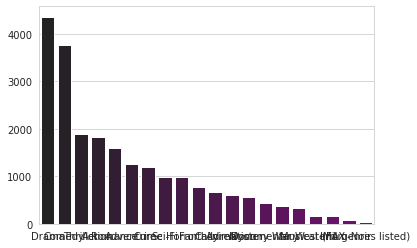

In [17]:
sns.set_style('whitegrid')
sns.barplot(
    x=genresOrderedOccurenceSeries.index,
    y=genresOrderedOccurenceSeries.values,
    palette=sns.dark_palette("Purple", n_colors=n_genres)
)

## Desafio 1

Rotacionar os _thicks_ (os nomes dos gêneros) do gráfico de barras, de forma a deixar as legendas mais legíveis.

[Text(0, 0, 'Drama'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'IMAX'),
 Text(0, 0, 'Film-Noir'),
 Text(0, 0, '(no genres listed)')]

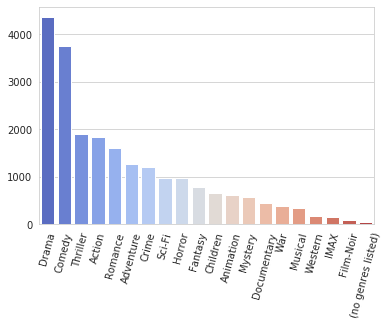

In [18]:
ticks = genresOrderedOccurenceSeries.index
sns.barplot(
    x=genresOrderedOccurenceSeries.index,
    y=genresOrderedOccurenceSeries.values,
    palette=sns.color_palette("coolwarm", n_colors=n_genres),
).set_xticklabels(ticks, rotation=75)

## Desafio 2

Encontar vários filmes com médias próximas e distribuições diferentes, use a função `plot_filmes(n)` para plotar.

In [19]:
def plot_filmes(n):
    ratingSeries = ratingsDF.query(f'movieId=={n}')['rating']
    ratingSeries.plot(kind='hist')
    plt.show()
    ratingSeries.plot.box()
    plt.show()
    return ratingSeries.describe()

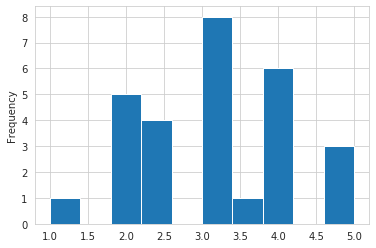

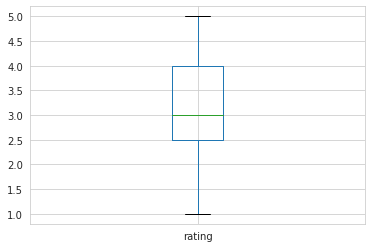

count    28.000000
mean      3.125000
std       1.014935
min       1.000000
25%       2.500000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

In [20]:
plot_filmes(24)

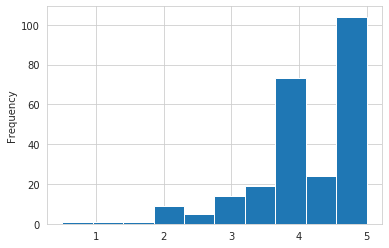

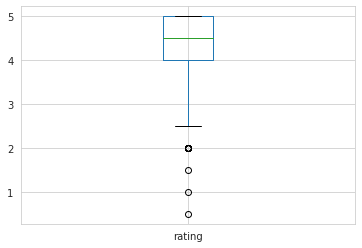

count    251.000000
mean       4.231076
std        0.872004
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [21]:
plot_filmes(260)

## Desafio 3

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!).
Não apenas plot mas também analise e tente tirar conclusões

In [22]:
top10 = aula1DF.sort_values(by='ratingCount', ascending=False)[:10]
top10

,movieId,title,genres,ratingMean,ratingCount
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


[Text(0, 0, 'Forrest Gump (1994)'),
 Text(0, 0, 'Shawshank Redemption, The (1994)'),
 Text(0, 0, 'Pulp Fiction (1994)'),
 Text(0, 0, 'Silence of the Lambs, The (1991)'),
 Text(0, 0, 'Matrix, The (1999)'),
 Text(0, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
 Text(0, 0, 'Jurassic Park (1993)'),
 Text(0, 0, 'Braveheart (1995)'),
 Text(0, 0, 'Terminator 2: Judgment Day (1991)'),
 Text(0, 0, "Schindler's List (1993)")]

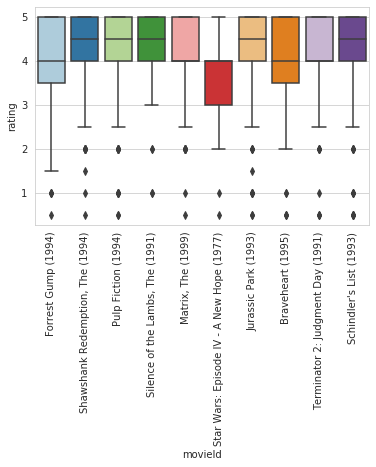

In [23]:
sns.boxplot(
    data=ratingsDF.query(f"movieId in {list(top10['movieId'])}"),
    x='movieId',
    y='rating',
    palette=sns.color_palette('Paired', 10)
).set_xticklabels(top10['title'], rotation=90)

### Conclusões

- A maioria dos filmes estreou na década de 90;

- Os top 3 são de 1994 e também possuem o gênero drama em comum;

- Suas medianas são 4 ou 4.5;

- E com exceção a _Star Wars_, 50% das notas se concentra entre as notas 5 e 4.

## Desafio 4

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula).
Configurar o tamanho e colocar o nome dos filmes nos thicks.

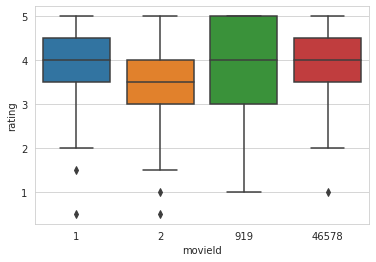

In [24]:
listaId = [1,2,919,46578]
# Ultimo boxplot da aula
sns.boxplot(
    data=ratingsDF.query(f"movieId in {listaId}"),
    x="movieId",
    y="rating"
)

[Text(0, 0, 'Toy Story (1995)'),
 Text(0, 0, 'Jumanji (1995)'),
 Text(0, 0, 'Wizard of Oz, The (1939)'),
 Text(0, 0, 'Little Miss Sunshine (2006)')]

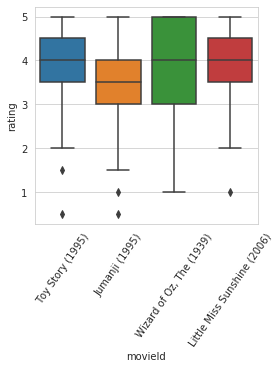

In [25]:
plt.figure(figsize=(4, 4))
sns.boxplot(
    data=ratingsDF.query(f"movieId in {listaId}"),
    x="movieId",
    y="rating",
).set_xticklabels(
    [movieName for movieName in moviesDF.query(f'movieId in {listaId}')['title']],
    rotation=55
)

## Deasafio 5

Calcular moda, média e mediana dos filmes.
Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [26]:
def explora_filme(filme_id):
    filme = moviesDF.query(f'movieId == {filme_id}')
    notas = ratingsDF.query(f'movieId == {filme_id}')['rating']

    print(f'Filme: {filme.iloc[0, 1]}\n')

    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------\n')

In [27]:
explora_filme(260)
explora_filme(42)
explora_filme(1)
explora_filme(2571)

Filme: Star Wars: Episode IV - A New Hope (1977)

Moda: [5.]
Média: 4.231075697211155
Mediana: 4.5
------------

Filme: Dead Presidents (1995)

Moda: [3.]
Média: 3.0
Mediana: 3.0
------------

Filme: Toy Story (1995)

Moda: [4.]
Média: 3.9209302325581397
Mediana: 4.0
------------

Filme: Matrix, The (1999)

Moda: [5.]
Média: 4.192446043165468
Mediana: 4.5
------------



## Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

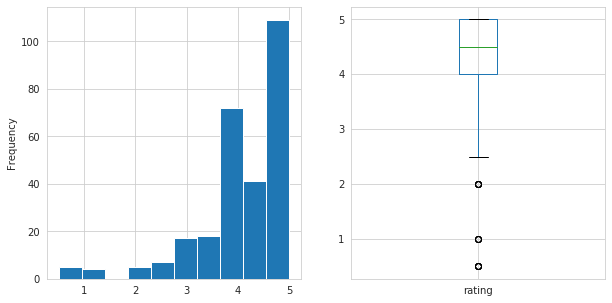

In [28]:
matrix = ratingsDF.query('movieId == 2571')['rating']

figura_resultante, axes = plt.subplots(1, 2, figsize=(10, 5))

matrix.plot(kind='hist', ax=axes[0])
matrix.plot(kind='box', ax=axes[1])

plt.show()

## Desafio 7

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [29]:
aula1DF['year'] = aula1DF['title'].str.extract("\((\d{4})\)")
aula1DF.head(3)

,movieId,title,genres,ratingMean,ratingCount,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1995


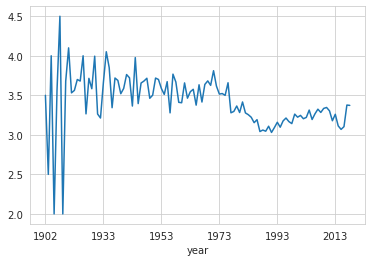

In [30]:
mean_by_year = aula1DF.groupby('year')['ratingMean'].mean()

mean_by_year.plot()